/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8335 - loss: 0.6009 - val_accuracy: 0.9472 - val_loss: 0.1837
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9562 - loss: 0.1565 - val_accuracy: 0.9643 - val_loss: 0.1263
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9701 - loss: 0.1069 - val_accuracy: 0.9723 - val_loss: 0.0941
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9790 - loss: 0.0760 - val_accuracy: 0.9768 - val_loss: 0.0784
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9855 - loss: 0.0553 - val_accuracy: 0.9765 - val_loss: 0.0776
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9875 - loss: 0.0454 - val_accuracy: 0.9774 - val_loss: 0.0720
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9908 - loss: 0.0343 - val_accuracy: 0.9802 - val_loss: 0.0641
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9934 - loss: 0.0267 - val_accu

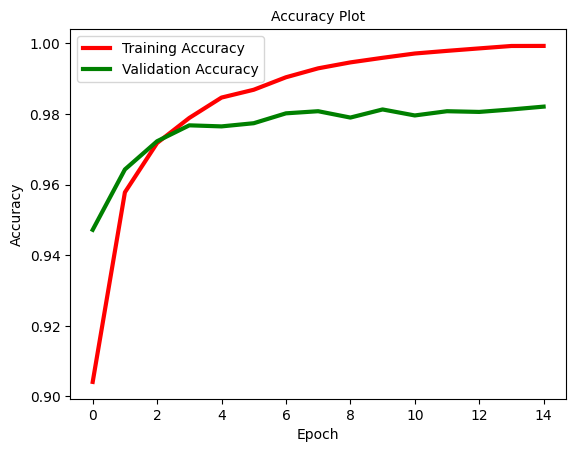

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7921 - loss: 0.6969 - val_accuracy: 0.9468 - val_loss: 0.1875
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9408 - loss: 0.2069 - val_accuracy: 0.9621 - val_loss: 0.1295
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9578 - loss: 0.1459 - val_accuracy: 0.9673 - val_loss: 0.1071
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9664 - loss: 0.1137 - val_accuracy: 0.9729 - val_loss: 0.0890
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9720 - loss: 0.0986 - val_accuracy: 0.9748 - val_loss: 0.0803
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9751 - loss: 0.0844 - val_accuracy: 0.9757 - val_loss: 0.0734
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9769 - loss: 0.0781 - val_accuracy: 0.9796 - val_loss: 0.0670
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9804 - loss: 0.0657 - val_accu

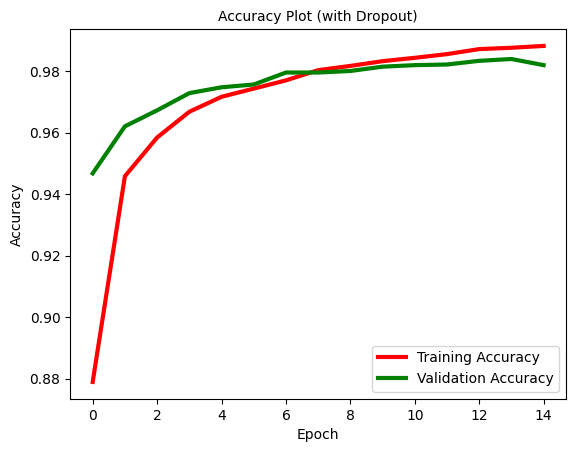

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
import numpy as np

# Load the MNIST dataset
(tr_input, tr_label), (test_input, test_label) = mnist.load_data()

# Preprocess the data
tr_label = to_categorical(tr_label, 10)
test_label = to_categorical(test_label, 10)

dimData = np.prod(tr_input.shape[1:])
tr_input = tr_input.reshape(tr_input.shape[0], dimData).astype('float32') / 255
test_input = test_input.reshape(test_input.shape[0], dimData).astype('float32') / 255

# Creating model
model = Sequential()
# Hidden layer
model.add(Dense(500, activation='relu', input_shape=(dimData,)))
# Output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(tr_input, tr_label, batch_size=300, epochs=15, verbose=1, validation_data=(test_input, test_label))

# Evaluate the model
[test_loss, test_acc] = model.evaluate(test_input, test_label)
print("Results on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# Plotting the accuracy graphs
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'g', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=10)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Plot', fontsize=10)
plt.show()

# Adding regularization (Dropout) to avoid overfitting
reg_model = Sequential()
reg_model.add(Dense(512, activation='relu', input_shape=(dimData,)))
reg_model.add(Dropout(0.5))
reg_model.add(Dense(10, activation='softmax'))

reg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reg_history = reg_model.fit(tr_input, tr_label, batch_size=300, epochs=15, verbose=1, validation_data=(test_input, test_label))

[test_loss, test_acc] = reg_model.evaluate(test_input, test_label)
print("Results on Test Data with Regularization: Loss = {}, accuracy = {}".format(test_loss, test_acc))

# Plotting the accuracy graphs for the regularized model
plt.plot(reg_history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(reg_history.history['val_accuracy'], 'g', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=10)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Plot (with Dropout)', fontsize=10)
plt.show()

In [ ]:
import tensorflow as tf

# Load the MNIST dataset directly from TensorFlow
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check the shapes of the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the 28x28 images into vectors of length 784
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalize the images by dividing by 255
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels (from 0-9 to vectors of length 10)
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
from tensorflow.keras import models, layers

# Build the feedforward neural network model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))  # Hidden layer with 512 units
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 units (one for each digit class)

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model on the training data
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9923 - loss: 0.0262
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9949 - loss: 0.0196
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9961 - loss: 0.0155
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9972 - loss: 0.0112
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9979 - loss: 0.0086
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0775


In [ ]:
# Print test accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9811000227928162


In [ ]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Print the predicted label for the first test image
print('Predicted label for the first test image:', predictions[0].argmax())

# Print the true label for the first test image
print('True label for the first test image:', test_labels[0].argmax())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for the first test image: 7
True label for the first test image: 7


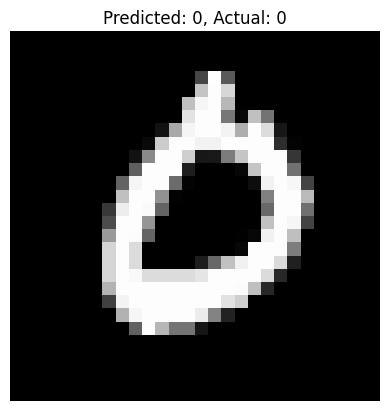

In [ ]:
import random

# Randomly select an index from the test set
random_index = random.randint(0, len(test_images) - 1)

# Make predictions
predicted_label = predictions[random_index].argmax()
actual_label = test_labels[random_index].argmax()

# Display the image and the predicted/actual labels
plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()

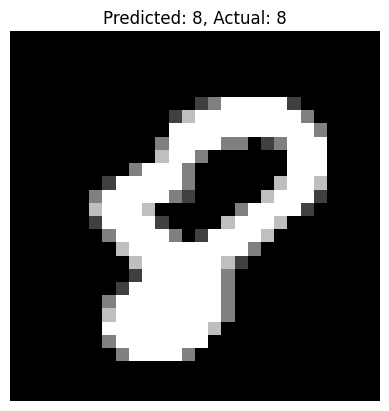

In [ ]:
import random

# Randomly select an index from the test set
random_index = random.randint(0, len(test_images) - 1)

# Make predictions
predicted_label = predictions[random_index].argmax()
actual_label = test_labels[random_index].argmax()

# Display the image and the predicted/actual labels
plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()

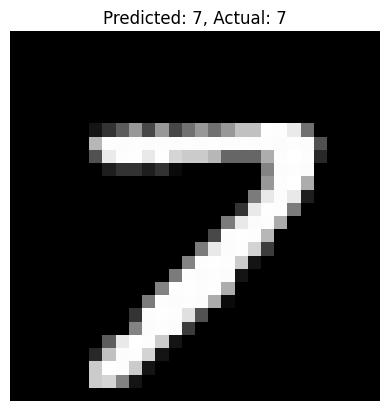

In [ ]:
import random

# Randomly select an index from the test set
random_index = random.randint(0, len(test_images) - 1)

# Make predictions
predicted_label = predictions[random_index].argmax()
actual_label = test_labels[random_index].argmax()

# Display the image and the predicted/actual labels
plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()

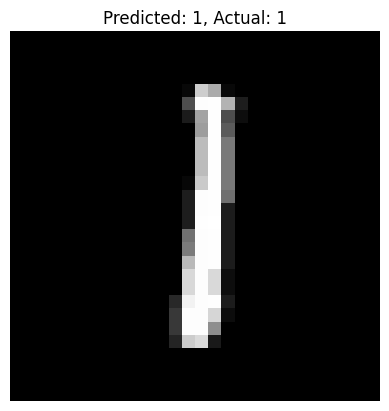

In [ ]:
import random

# Randomly select an index from the test set
random_index = random.randint(0, len(test_images) - 1)

# Make predictions
predicted_label = predictions[random_index].argmax()
actual_label = test_labels[random_index].argmax()

# Display the image and the predicted/actual labels
plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()

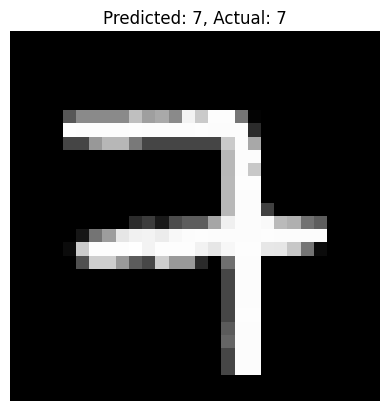

In [ ]:
import random

# Randomly select an index from the test set
random_index = random.randint(0, len(test_images) - 1)

# Make predictions
predicted_label = predictions[random_index].argmax()
actual_label = test_labels[random_index].argmax()

# Display the image and the predicted/actual labels
plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()

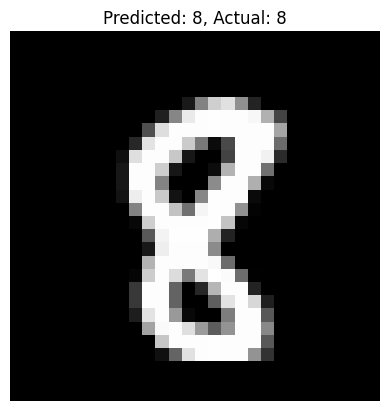

In [ ]:
import random

# Randomly select an index from the test set
random_index = random.randint(0, len(test_images) - 1)

# Make predictions
predicted_label = predictions[random_index].argmax()
actual_label = test_labels[random_index].argmax()

# Display the image and the predicted/actual labels
plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()